# Adaptative Feature Extraction

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
import pandas as pd
import math
import glob
import os
from sklearn.impute import KNNImputer

# ROI Extraction

In [2]:
def ROI_extraction():
    ROI = []
    filenames = []
    trainset = pd.read_csv('trainset/trainset.csv')
    for e in [r'trainset/*.png']:    
        for filepath in glob.iglob(e): 

            filename= filepath.split(os.path.sep)[-1]
            img = cv2.imread("trainset/"+filename)

            f = filename.replace(".png","")
            idx = np.where(trainset["filename"]==f)[0][0]
            n_img = img[int(trainset[" y_24"][idx]-70):int(trainset[" y_8"][idx]+10),int(trainset[" x_0"][idx]):int(trainset[" x_16"][idx])]

            filenames.append(filename)
            ROI.append(n_img)
    return ROI, filenames
            

In [3]:
%time _ = ROI_extraction()

CPU times: user 3.97 s, sys: 737 ms, total: 4.71 s
Wall time: 5.23 s


In [4]:
ROI, filenames = ROI_extraction()

# Feature Extraction

In [5]:
import math

def divisorGenerator(n):
    large_divisors = []
    for i in range(1, int(math.sqrt(n) + 1)):
        if n % i == 0:
            yield i
            if i*i != n:
                large_divisors.append(n / i)
    for divisor in reversed(large_divisors):
        yield divisor

In [6]:
def feature_extraction(ROI):
    if not isinstance(ROI,list):
        print("Roi type must be list of numpy.array images") 
        return 0
    fd, hog_img = [],[]
    for e in range(len(ROI)):
        #print(e)
        # Calculate parameters 
        #alldiv = list(divisorGenerator(ROI[e].shape[0]))
        #div = 1
        #for i in range(len(alldiv)):
        #    if alldiv[i]<3 :
        #        div = alldiv[i]
        #ppc=math.gcd(round(ROI[e].shape[0]/div),ROI[e].shape[1])

        # Implementing HOG feature
        #print("ppc",ppc)
        ppc = 10
        a,b = hog(ROI[e], orientations=9, pixels_per_cell=(ppc,ppc),cells_per_block=(1, 1), visualize=True, multichannel=True,feature_vector=True)
        fd.append(a)
        hog_img.append(b)
    return fd,hog_img

### Example

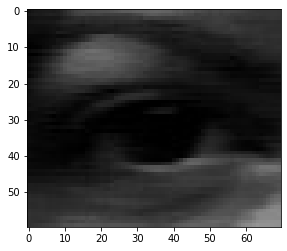

In [7]:
img = cv2.imread('trainset/S010_001_00000001.png')
n_img = img[190:250,280:350]
n_img.shape[1]
a = [n_img,n_img]
list(divisorGenerator(a[0].shape[0]))
plt.imshow(n_img)

378


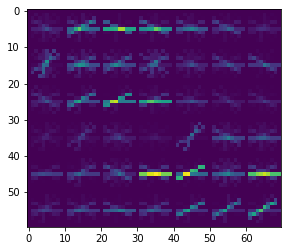

In [8]:
fd,hog_img = feature_extraction(a)
plt.imshow(hog_img[1])
print(len(fd[0]))

In [9]:
%time _ = fd, hog_img = feature_extraction(ROI)

CPU times: user 1min 54s, sys: 3.05 s, total: 1min 57s
Wall time: 2min


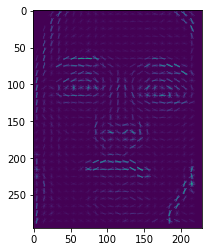

In [10]:
plt.imshow(hog_img[5])

In [11]:
max(map(len, fd))

9450

In [12]:
len(fd[3])

6480

In [13]:
def normalize_size(feat_desc):
    n_arr = []
    tmp = []
    for i in range(len(feat_desc)):
        for j in range(max(map(len, feat_desc))):
            if j >= len(feat_desc[i]):
                tmp.append(np.nan)
            else :
                tmp.append(feat_desc[i][j])
        n_arr.append(tmp)
        tmp = []
    return n_arr

In [14]:
fd1 = normalize_size(fd)

In [15]:
len(fd1)

722

In [16]:
arr = np.array(fd1)
dataf = pd.DataFrame(arr)
dataf

,0,1,2,3,4,5,6,7,8,9,...,9440,9441,9442,9443,9444,9445,9446,9447,9448,9449
0,0.384828,0.384828,0.384828,0.384828,0.384828,0.167817,0.384828,0.223756,0.182256,0.393728,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.377383,0.377383,0.318366,0.377383,0.377383,0.193224,0.377383,0.253056,0.291855,0.366152,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.416641,0.416641,0.416641,0.416641,0.396335,0.077165,0.103276,0.046288,0.360273,0.571181,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.385261,0.385261,0.385261,0.385261,0.385261,0.329092,0.385261,0.000000,0.033809,0.403060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.367154,0.367154,0.367154,0.367154,0.367154,0.367154,0.367154,0.158793,0.176547,0.391302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.433019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
718,0.377311,0.377311,0.377311,0.377311,0.377311,0.377311,0.254796,0.271699,0.084117,0.393098,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
719,0.394115,0.394115,0.394115,0.193590,0.394115,0.032150,0.171835,0.394115,0.394115,0.545756,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
720,0.390025,0.390025,0.390025,0.390025,0.390025,0.204234,0.311972,0.229639,0.218246,0.390875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
imputer = KNNImputer(n_neighbors=5)
arr = imputer.fit_transform(dataf[dataf.columns[0:9449]])

In [18]:
dataf = pd.DataFrame(arr)
dataf.isnull().sum().sum()

0

In [19]:
dataf.head(5)

,0,1,2,3,4,5,6,7,8,9,...,9439,9440,9441,9442,9443,9444,9445,9446,9447,9448
0,0.384828,0.384828,0.384828,0.384828,0.384828,0.167817,0.384828,0.223756,0.182256,0.393728,...,0.308336,0.225635,0.463673,0.128284,0.251206,0.463673,0.463673,0.15093,0.329228,0.25934
1,0.377383,0.377383,0.318366,0.377383,0.377383,0.193224,0.377383,0.253056,0.291855,0.366152,...,0.308336,0.225635,0.463673,0.128284,0.251206,0.463673,0.463673,0.15093,0.329228,0.25934
2,0.416641,0.416641,0.416641,0.416641,0.396335,0.077165,0.103276,0.046288,0.360273,0.571181,...,0.308336,0.225635,0.463673,0.128284,0.251206,0.463673,0.463673,0.15093,0.329228,0.25934
3,0.385261,0.385261,0.385261,0.385261,0.385261,0.329092,0.385261,0.000000,0.033809,0.403060,...,0.308336,0.225635,0.463673,0.128284,0.251206,0.463673,0.463673,0.15093,0.329228,0.25934
4,0.367154,0.367154,0.367154,0.367154,0.367154,0.367154,0.367154,0.158793,0.176547,0.391302,...,0.308336,0.225635,0.463673,0.128284,0.251206,0.463673,0.463673,0.15093,0.329228,0.25934


In [20]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(dataf)

PCA()

In [21]:

var=np.cumsum(pca.explained_variance_ratio_)

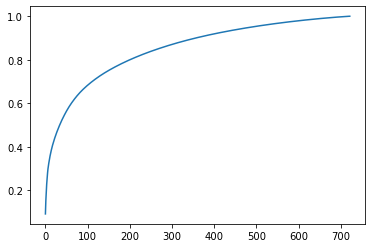

In [22]:
plt.plot(var)

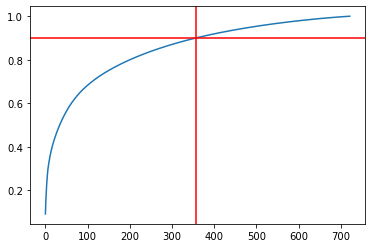

In [23]:
plt.plot(var)
plt.axhline(y=0.9, color='r', linestyle='-')
plt.axvline(x=356, color='r', linestyle='-')
plt.show()

In [24]:
np.argmax(var > 0.9)

356

In [25]:
pca = PCA(n_components=356)
reduced = pca.fit_transform(dataf)
recovered = pd.DataFrame(data = reduced)


In [26]:
pd.set_option('display.max_columns', None)
recovered.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355
0,2.789019,0.037405,-2.511366,-0.165224,-1.180066,0.673756,-0.102085,-1.180398,0.247612,-1.564550,-0.411294,-1.696092,1.648061,-2.280714,0.217339,0.650649,0.021513,-0.340745,0.076910,0.275437,-2.254947,0.099891,0.412824,-0.166897,-1.448029,0.077101,-0.457364,0.928717,-0.268896,-0.202671,0.336287,1.392586,0.392090,-1.182186,-0.299125,0.051369,-0.898135,-1.240182,-0.086832,-0.209817,0.381263,0.296993,-0.070013,-0.570085,-0.404691,-1.190677,0.135725,-0.559642,0.809404,0.523110,0.552631,1.119124,-0.340177,-0.871270,0.300062,0.407130,-0.462867,0.475370,-0.360536,0.831655,-0.300211,-1.183128,0.024893,-0.069296,-0.563650,0.475858,-0.073099,-0.021062,0.010393,0.515059,-0.409789,0.491082,0.351448,-0.023902,-0.011899,0.202204,-0.115478,0.322529,-0.236717,0.034003,-0.674946,-0.358538,0.388134,0.405786,-0.220970,-0.183005,-0.230309,-0.276542,-0.408670,0.040896,0.120963,-0.018184,-0.265024,0.108944,-0.547618,-0.164006,0.112142,-0.125371,-0.212704,0.206792,0.474729,0.175947,-0.210682,-0.133744,-0.110340,0.141130,0.302900,-0.160279,0.063366,-0.567934,0.023836,-0.234005,-0.671690,-0.013400,0.334731,0.184646,-0.070080,0.273689,0.037380,-0.123054,0.053954,-0.050922,0.195783,-0.368351,0.061279,-0.407332,-0.212637,0.151956,-0.021445,0.063294,0.126096,-0.255357,0.215045,-0.088822,-0.187846,-0.433134,0.233461,0.156684,0.422219,-0.293973,-0.291374,-0.076053,-0.254160,-0.105579,-0.723024,0.168205,0.254099,-0.281376,0.017753,-0.299011,-0.044963,-0.254699,-0.263760,-0.216933,0.076981,0.144074,0.016468,0.226853,0.071814,-0.079979,0.174298,0.459470,-0.021163,0.031600,-0.262300,-0.008830,0.119895,0.276366,-0.159641,0.115007,0.323727,-0.004193,-0.328470,0.038259,-0.470775,-0.001248,0.030260,0.080513,-0.094279,-0.325947,0.058530,-0.454354,0.133414,-0.149789,-0.117962,0.096892,0.061754,-0.188306,-0.165141,0.444747,-0.173173,-0.087138,0.183901,-0.484690,-0.387572,-0.021995,-0.157955,-0.428960,-0.047648,-0.049950,0.604951,0.169697,-0.708640,0.217555,0.136365,0.154939,0.154265,-0.038647,0.336157,-0.332062,-0.054093,0.187988,-0.372839,-0.199028,0.311310,-0.014776,-0.022705,0.539102,-0.420439,0.197601,-0.059626,0.281280,0.480273,0.269227,-0.187334,-0.055247,0.164286,0.277619,0.032959,0.200372,0.348412,-0.128157,-0.369584,-0.286137,0.473437,-0.094526,-0.127402,0.206734,-0.248935,0.293634,-0.451799,0.577046,-0.149651,-0.404705,0.501209,-0.237680,0.114990,0.326135,0.741225,0.008191,0.033805,-0.111570,0.118337,0.097157,0.530506,-0.028237,-0.100871,-0.321383,0.077806,-0.034149,0.225139,0.397153,-0.275978,-0.109824,-0.396207,0.227071,0.687824,-0.250947,-0.580922,0.234489,0.572653,-0.551670,-0.266974,-0.170521,0.111503,0.184994,-0.161065,-0.284893,0.645578,0.016685,0.222756,-0.577

In [27]:
len(recovered[0])

722

In [28]:
def unique_independant_subject(X):
    
    #Extracting only the name of the subject (column 'filename')
    filenames = X.iloc[:, 0]
    #filenames.head(5)
    
    #Save a copy of the trainset in 'trainsetCpy'
    XCpy = X.copy()
    #We replace the column 'filename' with the id of each subject. The id is composed  by the first 4 characters.
    XCpy.loc[XCpy['filename'].notnull(), 'filename'] = ""
    for i in range (0, 4): 
        XCpy.loc[XCpy['filename'].notnull(), 'filename'] += X['filename'].str[i]
    #XCpy.head(5)
    
    #We shuffle randomly the dataset in order to do the separation subject independant properly and for any order of the rows
    xshuffle = XCpy.sample(frac=1)
    #xshuffle.head(5)
  
    #We extract all the unique people in the trainset
    unique_users = xshuffle['filename'].unique()
    #print(unique_users)
    #print("There is ", len(unique_users), " unique people in the trainset")
    
    #We split the unique users with 80% in train and 20% in validation
    #We will test our model on the validation before the prediction on the real testset
    trainset_train_unique, trainset_validation_unique = np.split(np.random.permutation(unique_users), [int(.8 * len(unique_users))])
    #print("There is ", len(trainset_train_unique), " unique people in the trainset_train_unique")
    #print("There is ", len(trainset_validation_unique), " unique people in the trainset_validation_unique")
    
    #---------------------------------------------------------------------
    
    #We recreate the dataset corresponding to the unique users
    trainset_train = X.copy() #trainset_train is the final data set for real training containing images for unique people
    trainset_validation = X.copy() #trainset_validation is the final data set for validation containing images for unique people
    #count1 = 0
    #count2 = 0

    #We put all the values of column 'filename' to empty string
    trainset_train.loc[XCpy['filename'].notnull(), 'filename'] = "" 
    trainset_validation.loc[XCpy['filename'].notnull(), 'filename'] = "" 

    #We loop the whole trainset using iteritems(). columnName is the name of the column
    #and columnData in a sort of list of each value of the columnn

    #
    for (columnName, columnData) in X.iteritems():
        #We want only the column 'filename'
        if(columnName == 'filename'):

            #We select each unique subject in the train_set
            for j in trainset_train_unique:
                #print("unique_users_train", j)

                #We select all the subject (complete value. Ex: S005_001_00000001) in the trainset
                for i in range(len(columnData.values)):
                    #We put the value in the variable 'select_users'
                    select_users = columnData.values[i]
                    #print("Select_users", select_users[0:4])

                    #We select only the first four characters corresponding to the unique id of the subjects
                    #and if the unique value equals the subset,
                    if(j == select_users[0:4]):
                        #we get all the rows
                        trainset_train.iloc[i, 0] = select_users
                        #count1 = count1+1
                    else:
                        #print("Not corresponding")
                        pass

            #We select each unique subject in the validation_set
            for k in trainset_validation_unique:
                #print("unique_users_val", k)

                #We select all the subject (complete value. Ex: S005_001_00000001) in the trainset
                for l in range(len(columnData.values)):
                    #We put the value in the variable 'select_users'
                    select_users = columnData.values[l]
                    #print("Select_users", select_users[0:4])

                    #We select only the first four characters corresponding to the unique id of the subjects
                    #and if the unique value equals the subset,
                    if(k == select_users[0:4]):
                        #we get all the rows
                        trainset_validation.iloc[l, 0] = select_users
                        #count2 = count2+1
                    else:
                        #print("Not corresponding")
                        pass

    #print(count1, count2) 
    
    #Here there are empty value for the column 'filename' because above, we took the whole line for trainset_train
    #trainset_train.head(5)
    #Here there are empty value for the column 'filename' because above, we took the whole line for validation_train
    #trainset_validation.head(5) 
    
    #We replace these empty values by nan for both train and validation
    trainset_train['filename'].replace('', np.nan, inplace=True)
    trainset_validation['filename'].replace('', np.nan, inplace=True)

    #And we drop the nan values for both train and validation
    trainset_train.dropna(subset=['filename'], inplace=True)
    trainset_validation.dropna(subset=['filename'], inplace=True)
    
    #Finaly every images in the dataset are unique
    #trainset_train.head(5)
    
    #Finaly every images in the dataset are unique
    #trainset_validation.head(5)

    return trainset_train, trainset_validation

In [29]:
#load train dataset in the noteBook
trainset = pd.read_csv('trainset/trainset.csv')
#This is to print all the rows and columns when using head
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', trainset.shape[0]+1)
trainset.head(5)

,filename,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,y_0,y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,y_9,y_10,y_11,y_12,y_13,y_14,y_15,y_16,y_17,y_18,y_19,y_20,y_21,y_22,y_23,y_24,y_25,y_26,y_27,y_28,y_29,y_30,y_31,y_32,y_33,y_34,y_35,y_36,y_37,y_38,y_39,y_40,y_41,y_42,y_43,y_44,y_45,y_46,y_47,y_48,y_49,y_50,y_51,y_52,y_53,y_54,y_55,y_56,y_57,y_58,y_59,y_60,y_61,y_62,y_63,y_64,y_65,y_66,y_67,label
0,S005_001_00000001,213.7,214.1,217.7,223.7,236.9,262.2,299.3,340.3,381.0,418.1,450.7,478.6,500.2,512.2,516.9,519.3,518.9,248.8,266.1,291.1,317.6,342.6,395.8,419.9,444.0,468.1,486.5,371.5,373.3,375.0,376.5,348.3,362.3,376.3,389.9,402.4,282.8,298.9,316.8,332.1,317.0,299.2,408.5,423.0,440.6,456.2,442.6,425.6,325.0,344.8,363.6,378.1,393.5,411.8,428.9,413.5,397.0,380.3,364.7,345.6,334.5,363.7,378.3,394.1,420.5,394.3,378.3,363.6,207.1,245.8,285.0,323.0,356.7,384.4,403.1,416.4,419.9,415.9,403.2,386.6,361.8,327.5,287.0,243.7,200.5,179.2,162.5,157.1,160.4,168.0,164.6,154.3,149.9,152.9,166.5,198.0,221.9,245.4,269.8,288.2,292.2,295.3,291.4,287.1,203.9,195.5,194.9,204.8,208.1,208.6,201.5,190.1,189.6,196.6,202.4,203.6,338.9,325.0,318.1,321.4,317.5,323.9,334.6,348.8,355.4,357.2,356.4,351.8,337.6,333.1,333.6,331.9,335.1,335.0,336.4,335.8,0
1,S005_001_00000011,215.0,214.6,217.3,223.4,236.9,262.7,300.6,340.6,380.5,417.6,450.0,478.0,500.1,512.6,517.2,519.1,517.9,246.5,265.0,291.8,318.3,342.9,397.5,421.1,445.2,469.9,489.9,371.8,373.4,374.8,376.0,346.5,360.8,375.5,389.5,402.4,276.3,293.4,311.6,328.7,312.0,293.9,412.7,429.4,447.3,463.2,448.9,431.3,324.8,343.6,362.0,376.9,393.1,411.6,428.6,412.9,396.1,378.2,362.2,343.9,334.7,361.7,376.9,393.4,419.8,393.7,376.7,361.4,209.0,246.4,285.1,322.8,357.5,385.2,403.3,416.7,420.7,417.0,404.3,388.3,364.4,330.6,289.7,245.6,201.9,181.8,166.1,163.3,168.4,176.7,172.2,160.7,154.0,154.3,166.7,197.2,219.9,242.6,266.2,283.0,287.8,291.0,287.2,282.9,202.9,195.4,194.4,203.1,206.0,206.8,199.3,188.8,188.5,194.5,199.9,200.8,333.2,318.5,311.6,315.1,310.9,318.5,330.5,344.2,351.4,353.5,352.4,346.9,331.7,326.9,327.5,326.1,330.3,330.2,332.0,331.3,3
2,S010_001_00000001,261.3,263.7,268.2,274.2,284.0,301.3,324.9,353.6,385.7,416.3,442.0,464.6,483.1,493.6,497.9,500.3,500.1,270.5,285.1,305.9,327.5,348.4,403.4,426.6,448.4,469.5,485.1,377.4,378.4,379.3,380.3,354.5,367.4,380.8,394.3,406.4,295.1,308.1,325.7,341.0,325.7,308.7,414.4,428.7,446.1,460.2,447.7,431.0,333.0,352.0,369.6,382.2,395.4,414.8,433.4,416.6,398.1,383.6,370.0,352.0,340.9,369.7,382.6,396.2,426.0,396.1,382.4,369.5,239.5,270.1,299.7,328.0,354.4,377.5,396.3,411.8,415.8,411.4,396.9,378.3,354.6,325.0,293.1,259.9,226.6,203.7,191.6,187.9,189.8,195.1,193.3,185.1,182.1,185.1,196.2,221.7,244.2,266.7,289.6,303.6,308.5,312.1,307.4,302.2,228.6,218.9,218.1,227.9,232.4,233.4,225.3,214.1,214.0,221.9,227.7,228.2,346.1,339.3,335.8,338.5,334.8,337.8,342.4,357.0,363.9,365.4,364.5,358.9,346.7,346.8,347.5,345.6,343.6,346.9,348.3,347.3,0
3,S010_002_00000001,259.5,262.2,267.2,273.4,283.1,299.9,322.9,351.0,383.3,414.3,440.2,462.9,480.9,490.9,495.2,498.0,498.2,268.5,282.7,303.2,324.6,345.4,401.8,424.9,446.6,467.4,482.8,375.2,375.9,376.6,377.3,352.2,364.8,378.1,391.4,403.4,293.3,306.3,323.8,339.0,323.8,306.8,412.3,426.6,444.0,458.0,445.5,428.8,332.4,350.3,367.4,379.4,392.1,410.9,429.0,412.7,394.7,380.9,367.9,350.5,340.1,367.6,379.9,392.9,421.6,392.8,379.8,367.5,240.9,271.5,301.0,329.1,355.8,379.4,398.9,415.0,419.3,414.3,398.8,379.0,354.5,325.0,293.7,261.2,228.5,205.9,194.1,190.4,192.6,198.1,196.4,188.4,185.2,187.8,198.5,224.3,246.9,269.5,292.6,306.1,311.1,314.6,310.0,304.6,230.3,220.9,220.1,229.8,234.3,235.3,227.5,216.4,216.4,224.1,230.1,230.5,349.5,342.3,338.6,341.3,337.7,340.9,345.9,360.5,367.3,368.8,367.9,362.4,349.9,349.6,350.3,348.

In [30]:
trainsetCpy = trainset.copy()
#trainsetCpy['label'] = trainsetCpy['label'].map({0:'neutre', 1:'colere', 3:'degout', 4:'peur', 5:'joie', 6:'tristesse', 7:'surprise'})
#trainsetCpy = pd.get_dummies(trainsetCpy)
trainsetCpy.head()

,filename,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31,x_32,x_33,x_34,x_35,x_36,x_37,x_38,x_39,x_40,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50,x_51,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,x_61,x_62,x_63,x_64,x_65,x_66,x_67,y_0,y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,y_9,y_10,y_11,y_12,y_13,y_14,y_15,y_16,y_17,y_18,y_19,y_20,y_21,y_22,y_23,y_24,y_25,y_26,y_27,y_28,y_29,y_30,y_31,y_32,y_33,y_34,y_35,y_36,y_37,y_38,y_39,y_40,y_41,y_42,y_43,y_44,y_45,y_46,y_47,y_48,y_49,y_50,y_51,y_52,y_53,y_54,y_55,y_56,y_57,y_58,y_59,y_60,y_61,y_62,y_63,y_64,y_65,y_66,y_67,label
0,S005_001_00000001,213.7,214.1,217.7,223.7,236.9,262.2,299.3,340.3,381.0,418.1,450.7,478.6,500.2,512.2,516.9,519.3,518.9,248.8,266.1,291.1,317.6,342.6,395.8,419.9,444.0,468.1,486.5,371.5,373.3,375.0,376.5,348.3,362.3,376.3,389.9,402.4,282.8,298.9,316.8,332.1,317.0,299.2,408.5,423.0,440.6,456.2,442.6,425.6,325.0,344.8,363.6,378.1,393.5,411.8,428.9,413.5,397.0,380.3,364.7,345.6,334.5,363.7,378.3,394.1,420.5,394.3,378.3,363.6,207.1,245.8,285.0,323.0,356.7,384.4,403.1,416.4,419.9,415.9,403.2,386.6,361.8,327.5,287.0,243.7,200.5,179.2,162.5,157.1,160.4,168.0,164.6,154.3,149.9,152.9,166.5,198.0,221.9,245.4,269.8,288.2,292.2,295.3,291.4,287.1,203.9,195.5,194.9,204.8,208.1,208.6,201.5,190.1,189.6,196.6,202.4,203.6,338.9,325.0,318.1,321.4,317.5,323.9,334.6,348.8,355.4,357.2,356.4,351.8,337.6,333.1,333.6,331.9,335.1,335.0,336.4,335.8,0
1,S005_001_00000011,215.0,214.6,217.3,223.4,236.9,262.7,300.6,340.6,380.5,417.6,450.0,478.0,500.1,512.6,517.2,519.1,517.9,246.5,265.0,291.8,318.3,342.9,397.5,421.1,445.2,469.9,489.9,371.8,373.4,374.8,376.0,346.5,360.8,375.5,389.5,402.4,276.3,293.4,311.6,328.7,312.0,293.9,412.7,429.4,447.3,463.2,448.9,431.3,324.8,343.6,362.0,376.9,393.1,411.6,428.6,412.9,396.1,378.2,362.2,343.9,334.7,361.7,376.9,393.4,419.8,393.7,376.7,361.4,209.0,246.4,285.1,322.8,357.5,385.2,403.3,416.7,420.7,417.0,404.3,388.3,364.4,330.6,289.7,245.6,201.9,181.8,166.1,163.3,168.4,176.7,172.2,160.7,154.0,154.3,166.7,197.2,219.9,242.6,266.2,283.0,287.8,291.0,287.2,282.9,202.9,195.4,194.4,203.1,206.0,206.8,199.3,188.8,188.5,194.5,199.9,200.8,333.2,318.5,311.6,315.1,310.9,318.5,330.5,344.2,351.4,353.5,352.4,346.9,331.7,326.9,327.5,326.1,330.3,330.2,332.0,331.3,3
2,S010_001_00000001,261.3,263.7,268.2,274.2,284.0,301.3,324.9,353.6,385.7,416.3,442.0,464.6,483.1,493.6,497.9,500.3,500.1,270.5,285.1,305.9,327.5,348.4,403.4,426.6,448.4,469.5,485.1,377.4,378.4,379.3,380.3,354.5,367.4,380.8,394.3,406.4,295.1,308.1,325.7,341.0,325.7,308.7,414.4,428.7,446.1,460.2,447.7,431.0,333.0,352.0,369.6,382.2,395.4,414.8,433.4,416.6,398.1,383.6,370.0,352.0,340.9,369.7,382.6,396.2,426.0,396.1,382.4,369.5,239.5,270.1,299.7,328.0,354.4,377.5,396.3,411.8,415.8,411.4,396.9,378.3,354.6,325.0,293.1,259.9,226.6,203.7,191.6,187.9,189.8,195.1,193.3,185.1,182.1,185.1,196.2,221.7,244.2,266.7,289.6,303.6,308.5,312.1,307.4,302.2,228.6,218.9,218.1,227.9,232.4,233.4,225.3,214.1,214.0,221.9,227.7,228.2,346.1,339.3,335.8,338.5,334.8,337.8,342.4,357.0,363.9,365.4,364.5,358.9,346.7,346.8,347.5,345.6,343.6,346.9,348.3,347.3,0
3,S010_002_00000001,259.5,262.2,267.2,273.4,283.1,299.9,322.9,351.0,383.3,414.3,440.2,462.9,480.9,490.9,495.2,498.0,498.2,268.5,282.7,303.2,324.6,345.4,401.8,424.9,446.6,467.4,482.8,375.2,375.9,376.6,377.3,352.2,364.8,378.1,391.4,403.4,293.3,306.3,323.8,339.0,323.8,306.8,412.3,426.6,444.0,458.0,445.5,428.8,332.4,350.3,367.4,379.4,392.1,410.9,429.0,412.7,394.7,380.9,367.9,350.5,340.1,367.6,379.9,392.9,421.6,392.8,379.8,367.5,240.9,271.5,301.0,329.1,355.8,379.4,398.9,415.0,419.3,414.3,398.8,379.0,354.5,325.0,293.7,261.2,228.5,205.9,194.1,190.4,192.6,198.1,196.4,188.4,185.2,187.8,198.5,224.3,246.9,269.5,292.6,306.1,311.1,314.6,310.0,304.6,230.3,220.9,220.1,229.8,234.3,235.3,227.5,216.4,216.4,224.1,230.1,230.5,349.5,342.3,338.6,341.3,337.7,340.9,345.9,360.5,367.3,368.8,367.9,362.4,349.9,349.6,350.3,348.

In [31]:
filenames = trainsetCpy.iloc[:, 0]
label = trainsetCpy.iloc[:, 137]
recovered.insert(0, column='filename', value=filenames)
recovered.insert(357, column='label', value=label)
recovered.head(5)

,filename,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,label
0,S005_001_00000001,2.789019,0.037405,-2.511366,-0.165224,-1.180066,0.673756,-0.102085,-1.180398,0.247612,-1.564550,-0.411294,-1.696092,1.648061,-2.280714,0.217339,0.650649,0.021513,-0.340745,0.076910,0.275437,-2.254947,0.099891,0.412824,-0.166897,-1.448029,0.077101,-0.457364,0.928717,-0.268896,-0.202671,0.336287,1.392586,0.392090,-1.182186,-0.299125,0.051369,-0.898135,-1.240182,-0.086832,-0.209817,0.381263,0.296993,-0.070013,-0.570085,-0.404691,-1.190677,0.135725,-0.559642,0.809404,0.523110,0.552631,1.119124,-0.340177,-0.871270,0.300062,0.407130,-0.462867,0.475370,-0.360536,0.831655,-0.300211,-1.183128,0.024893,-0.069296,-0.563650,0.475858,-0.073099,-0.021062,0.010393,0.515059,-0.409789,0.491082,0.351448,-0.023902,-0.011899,0.202204,-0.115478,0.322529,-0.236717,0.034003,-0.674946,-0.358538,0.388134,0.405786,-0.220970,-0.183005,-0.230309,-0.276542,-0.408670,0.040896,0.120963,-0.018184,-0.265024,0.108944,-0.547618,-0.164006,0.112142,-0.125371,-0.212704,0.206792,0.474729,0.175947,-0.210682,-0.133744,-0.110340,0.141130,0.302900,-0.160279,0.063366,-0.567934,0.023836,-0.234005,-0.671690,-0.013400,0.334731,0.184646,-0.070080,0.273689,0.037380,-0.123054,0.053954,-0.050922,0.195783,-0.368351,0.061279,-0.407332,-0.212637,0.151956,-0.021445,0.063294,0.126096,-0.255357,0.215045,-0.088822,-0.187846,-0.433134,0.233461,0.156684,0.422219,-0.293973,-0.291374,-0.076053,-0.254160,-0.105579,-0.723024,0.168205,0.254099,-0.281376,0.017753,-0.299011,-0.044963,-0.254699,-0.263760,-0.216933,0.076981,0.144074,0.016468,0.226853,0.071814,-0.079979,0.174298,0.459470,-0.021163,0.031600,-0.262300,-0.008830,0.119895,0.276366,-0.159641,0.115007,0.323727,-0.004193,-0.328470,0.038259,-0.470775,-0.001248,0.030260,0.080513,-0.094279,-0.325947,0.058530,-0.454354,0.133414,-0.149789,-0.117962,0.096892,0.061754,-0.188306,-0.165141,0.444747,-0.173173,-0.087138,0.183901,-0.484690,-0.387572,-0.021995,-0.157955,-0.428960,-0.047648,-0.049950,0.604951,0.169697,-0.708640,0.217555,0.136365,0.154939,0.154265,-0.038647,0.336157,-0.332062,-0.054093,0.187988,-0.372839,-0.199028,0.311310,-0.014776,-0.022705,0.539102,-0.420439,0.197601,-0.059626,0.281280,0.480273,0.269227,-0.187334,-0.055247,0.164286,0.277619,0.032959,0.200372,0.348412,-0.128157,-0.369584,-0.286137,0.473437,-0.094526,-0.127402,0.206734,-0.248935,0.293634,-0.451799,0.577046,-0.149651,-0.404705,0.501209,-0.237680,0.114990,0.326135,0.741225,0.008191,0.033805,-0.111570,0.118337,0.097157,0.530506,-0.028237,-0.100871,-0.321383,0.077806,-0.034149,0.225139,0.397153,-0.275978,-0.109824,-0.396207,0.227071,0.687824,-0.250947,-0.580922,0.234489,0.572653,-0.551670,-0.266974,-0.170521,0.111503,0.184994,-0.161065,-0.284893,

In [32]:
trainset_train_X, trainset_validation_X = unique_independant_subject(recovered)

In [33]:
trainset_train_y = trainset_train_X.iloc[:, 357]

trainset_train_y.head(5)

0    0
1    3
2    0
3    0
4    7
Name: label, dtype: int64

In [34]:
trainset_validation_y = trainset_validation_X.iloc[:, 357]
trainset_validation_y

129    0
130    7
131    0
132    0
133    5
152    0
153    0
154    3
155    0
156    7
157    0
158    5
195    0
196    7
197    0
198    5
199    0
200    7
201    0
202    0
203    5
204    0
205    6
241    0
242    0
243    7
244    0
245    5
246    0
247    3
259    0
260    0
261    0
262    0
263    0
264    1
265    0
266    5
340    0
341    0
342    0
343    5
344    0
357    0
358    7
359    0
360    0
361    0
362    3
363    0
364    5
365    0
366    0
367    1
380    0
381    7
382    0
383    3
384    0
385    1
410    0
411    7
412    0
413    0
414    0
415    3
416    0
417    0
418    5
439    0
440    0
441    0
496    0
497    0
498    0
499    0
500    0
501    1
544    0
545    0
546    0
547    0
548    0
549    0
552    0
553    7
554    0
555    0
556    0
603    0
604    0
605    7
606    0
607    0
608    0
609    0
610    1
611    0
612    0
613    3
614    0
615    5
632    0
633    7
634    0
635    0
636    6
637    0
638    0
639    0
640    5
6

In [35]:
print(trainset_train_X.shape)
trainset_train_X.drop(columns=['filename'], inplace=True)
trainset_train_X.drop(columns=['label'], inplace=True)
trainset_train_X.head()

(600, 358)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355
0,2.789019,0.037405,-2.511366,-0.165224,-1.180066,0.673756,-0.102085,-1.180398,0.247612,-1.564550,-0.411294,-1.696092,1.648061,-2.280714,0.217339,0.650649,0.021513,-0.340745,0.076910,0.275437,-2.254947,0.099891,0.412824,-0.166897,-1.448029,0.077101,-0.457364,0.928717,-0.268896,-0.202671,0.336287,1.392586,0.392090,-1.182186,-0.299125,0.051369,-0.898135,-1.240182,-0.086832,-0.209817,0.381263,0.296993,-0.070013,-0.570085,-0.404691,-1.190677,0.135725,-0.559642,0.809404,0.523110,0.552631,1.119124,-0.340177,-0.871270,0.300062,0.407130,-0.462867,0.475370,-0.360536,0.831655,-0.300211,-1.183128,0.024893,-0.069296,-0.563650,0.475858,-0.073099,-0.021062,0.010393,0.515059,-0.409789,0.491082,0.351448,-0.023902,-0.011899,0.202204,-0.115478,0.322529,-0.236717,0.034003,-0.674946,-0.358538,0.388134,0.405786,-0.220970,-0.183005,-0.230309,-0.276542,-0.408670,0.040896,0.120963,-0.018184,-0.265024,0.108944,-0.547618,-0.164006,0.112142,-0.125371,-0.212704,0.206792,0.474729,0.175947,-0.210682,-0.133744,-0.110340,0.141130,0.302900,-0.160279,0.063366,-0.567934,0.023836,-0.234005,-0.671690,-0.013400,0.334731,0.184646,-0.070080,0.273689,0.037380,-0.123054,0.053954,-0.050922,0.195783,-0.368351,0.061279,-0.407332,-0.212637,0.151956,-0.021445,0.063294,0.126096,-0.255357,0.215045,-0.088822,-0.187846,-0.433134,0.233461,0.156684,0.422219,-0.293973,-0.291374,-0.076053,-0.254160,-0.105579,-0.723024,0.168205,0.254099,-0.281376,0.017753,-0.299011,-0.044963,-0.254699,-0.263760,-0.216933,0.076981,0.144074,0.016468,0.226853,0.071814,-0.079979,0.174298,0.459470,-0.021163,0.031600,-0.262300,-0.008830,0.119895,0.276366,-0.159641,0.115007,0.323727,-0.004193,-0.328470,0.038259,-0.470775,-0.001248,0.030260,0.080513,-0.094279,-0.325947,0.058530,-0.454354,0.133414,-0.149789,-0.117962,0.096892,0.061754,-0.188306,-0.165141,0.444747,-0.173173,-0.087138,0.183901,-0.484690,-0.387572,-0.021995,-0.157955,-0.428960,-0.047648,-0.049950,0.604951,0.169697,-0.708640,0.217555,0.136365,0.154939,0.154265,-0.038647,0.336157,-0.332062,-0.054093,0.187988,-0.372839,-0.199028,0.311310,-0.014776,-0.022705,0.539102,-0.420439,0.197601,-0.059626,0.281280,0.480273,0.269227,-0.187334,-0.055247,0.164286,0.277619,0.032959,0.200372,0.348412,-0.128157,-0.369584,-0.286137,0.473437,-0.094526,-0.127402,0.206734,-0.248935,0.293634,-0.451799,0.577046,-0.149651,-0.404705,0.501209,-0.237680,0.114990,0.326135,0.741225,0.008191,0.033805,-0.111570,0.118337,0.097157,0.530506,-0.028237,-0.100871,-0.321383,0.077806,-0.034149,0.225139,0.397153,-0.275978,-0.109824,-0.396207,0.227071,0.687824,-0.250947,-0.580922,0.234489,0.572653,-0.551670,-0.266974,-0.170521,0.111503,0.184994,-0.161065,-0.284893,0.645578,0.016685,0.222756,-0.577

In [36]:
print(trainset_validation_X.shape)
trainset_validation_X.drop(columns=['filename'], inplace=True)
trainset_validation_X.drop(columns=['label'], inplace=True)
trainset_validation_X.head()

(122, 358)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355
129,-2.030071,3.407519,-1.709689,-0.709665,-0.401654,0.468910,0.937111,0.415299,0.158977,-0.143870,0.378133,0.602788,0.749097,-0.255598,-1.028105,-0.442755,0.863214,-1.620702,-1.160636,0.150480,0.512052,0.589335,-0.423143,-0.766485,0.894893,0.675063,0.556719,-0.791739,0.520635,-0.131534,-0.254240,-0.581839,-0.326008,-0.206538,-1.331908,0.587013,-0.481304,-0.856422,-0.358068,-0.259492,-0.299155,-0.308425,0.045126,0.089470,0.294384,0.224501,0.965284,1.068343,0.611496,-0.888590,0.102416,-0.028636,0.158192,-0.790322,-0.117414,0.889412,0.173804,0.637107,-0.338455,-0.061556,-0.040664,-0.053852,-0.261073,0.040823,-0.766220,-0.405110,-0.415750,-0.076028,-0.445676,0.442313,0.325685,0.252619,-0.063409,0.226575,0.774444,-0.056828,0.476663,0.502559,-0.894439,-0.156185,-0.424398,-0.883603,-0.136971,0.368048,-0.423771,0.343454,-0.259724,-0.454616,-0.690517,-0.226247,-0.452559,0.467026,0.289151,-0.238406,0.584703,0.399289,0.583077,-1.467140,0.547489,-1.170642,-0.026974,-0.730760,1.399978,1.816944,0.206428,0.633969,0.215924,-0.669881,0.663209,-0.241262,0.248402,0.172129,-0.336872,0.801064,-0.475687,0.489197,0.329281,0.205416,-0.529502,0.401290,-0.312175,-0.131030,0.674786,0.638914,-1.437241,0.530620,0.394636,-0.187265,-1.400707,0.783248,0.345538,0.041479,1.123494,0.707526,-0.361567,0.468245,-0.007466,0.129225,-0.719198,-0.519313,1.146872,0.193639,-0.171131,-0.796800,0.344840,-0.907277,1.349141,-0.214854,-0.117015,-0.388593,0.264471,0.423141,1.115757,1.436488,-1.900178,0.055972,-0.685805,0.519341,0.447974,-0.571247,0.532480,1.076075,-0.763498,-0.050027,0.167371,-0.609346,-0.310781,0.577897,0.711810,-0.444578,0.155885,-0.875978,0.711324,0.751365,1.197988,-0.008407,1.482177,1.181729,-0.756448,-0.914403,0.526911,0.571306,1.151815,0.244079,0.573902,0.004270,1.933094,0.737835,-1.135136,-1.287754,-0.838286,0.084719,0.297749,-1.041437,-0.935164,0.572867,-0.144607,0.257135,-1.233407,0.100922,0.261013,0.551531,-0.632216,0.999461,-0.241543,0.025904,0.616218,0.215813,0.531400,0.370173,-0.793777,1.224125,0.460272,0.796368,0.938924,-0.264754,0.562799,-0.543553,0.068767,0.375940,-0.162719,0.198976,0.817816,-0.087992,-0.550644,-1.193596,0.106108,0.371137,-0.455567,0.082004,-0.979439,1.066353,-0.520996,0.690908,-0.010813,-0.179343,-0.327334,0.103075,0.850122,-0.148201,0.051439,-0.925454,-0.417770,-0.679006,-0.711457,0.573864,-0.496453,-0.311711,0.400491,0.170565,-0.201295,-0.022406,0.001293,0.023302,0.316646,0.997899,0.063969,-0.130512,0.295365,-0.228688,0.389374,-0.502048,-0.644493,-0.006986,-0.510569,-0.620372,-0.547640,-0.736080,0.466909,-0.080697,0.229794,0.193420,-1.150468,-0.181413,0.778943,0.581069,-0.215518,-0.623729,0.490747,0.183430,-0.355116,-0.282153,-0.4471

In [37]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn.fit(trainset_train_X, trainset_train_y)
y_pred = knn.predict(trainset_validation_X)

In [38]:
print(y_pred)
print(trainset_validation_y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 7 0 0 0 0 0 0 0 0 0]
129    0
130    7
131    0
132    0
133    5
152    0
153    0
154    3
155    0
156    7
157    0
158    5
195    0
196    7
197    0
198    5
199    0
200    7
201    0
202    0
203    5
204    0
205    6
241    0
242    0
243    7
244    0
245    5
246    0
247    3
259    0
260    0
261    0
262    0
263    0
264    1
265    0
266    5
340    0
341    0
342    0
343    5
344    0
357    0
358    7
359    0
360    0
361    0
362    3
363    0
364    5
365    0
366    0
367    1
380    0
381    7
382    0
383    3
384    0
385    1
410    0
411    7
412    0
413    0
414    0
415    3
416    0
417    0
418    5
439    0
440    0
441    0
496    0
497    0
498    0
499    0
500    0
501    1
544    0
545    0
546    0
547    0
548    0
549 

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(trainset_validation_y, y_pred)

0.6721311475409836

In [40]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(trainset_train_X, trainset_train_y);

In [41]:
# Use the forest's predict method on the test data
predictions = rf.predict(trainset_validation_X)
print(predictions)

[2.278 2.077 2.186 1.547 1.797 1.55  0.792 2.259 2.503 0.822 2.105 2.843
 2.174 1.106 0.965 1.564 3.41  2.121 2.327 1.734 0.886 1.904 1.299 0.915
 1.647 1.943 1.481 3.992 2.76  0.857 1.851 3.517 0.727 2.283 2.646 0.878
 0.927 2.438 1.858 1.784 3.124 1.895 2.295 1.534 1.833 2.611 1.124 2.05
 2.283 1.487 2.405 1.425 1.446 1.452 1.38  2.039 2.491 0.264 0.9   2.212
 2.212 1.119 2.793 1.686 2.648 2.341 2.055 0.849 0.587 1.886 2.885 0.944
 1.102 2.516 2.07  1.148 2.208 2.349 2.732 2.197 0.843 2.505 2.082 2.717
 2.567 2.168 2.155 2.2   2.333 1.121 2.239 1.295 2.349 2.615 0.976 1.189
 1.663 2.202 2.159 1.842 2.009 1.884 2.684 0.802 2.462 2.084 2.124 0.978
 2.137 1.602 2.036 2.301 4.59  1.001 1.641 1.312 1.31  1.458 1.62  3.12
 2.381 1.444]


In [42]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Calculate the absolute errors
errors = abs(predictions - trainset_validation_y)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 2.34 degrees.


In [43]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / trainset_validation_y)
# Calculate and display accuracy
print(np.mean(mape))
accuracy = 100 - np.mean(mape)
print(accuracy)
print('Accuracy:', accuracy, '%.')

inf
-inf
Accuracy: -inf %.


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [97]:
forest = RandomForestClassifier(n_estimators=1000,criterion="gini", max_depth=20,min_samples_split=2, min_samples_leaf=1,max_features="auto", max_leaf_nodes=None,bootstrap=True, oob_score=True, random_state = 42)

In [98]:
forest = forest.fit(trainset_train_X, trainset_train_y)

In [99]:
y_pred = forest.predict(trainset_validation_X)

In [106]:
acc = metrics.accuracy_score(trainset_validation_y, y_pred)
round(acc, 2)

0.69

# BROUILLON

In [ ]:
img = cv2.imread('trainset/S010_001_00000001.png')
n_img = img[190:250,280:350]
n_img.shape[1]
a = [n_img,n_img]
list(divisorGenerator(a[0].shape[0]))
plt.imshow(n_img)

In [ ]:
trainset = pd.read_csv('trainset/trainset.csv')

In [ ]:
trainset.head(10)

In [ ]:
file = "S005_001_00000001.png"
img = cv2.imread("trainset/"+file)
f = file.replace(".png","")
idx = np.where(trainset["filename"]==f)[0][0]
n_img = img[int(trainset[" y_24"][idx]-70):int(trainset[" y_8"][idx]+30),int(trainset[" x_0"][idx]-20):int(trainset[" x_16"][idx]+20)]
plt.imshow(n_img)
for i in range(67):
    var = f"{i}"
    plt.scatter(int(trainset[" x_"+var][idx]),int(trainset[" y_"+var][idx]))